# Python Pandas Tutorial: A Complete Introduction for Beginners

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

Think of pandas as the python version of Excel! 

Parts of this tutorial were adapted from a similar tutorial from the git repo: LearnDataSci

## 1.0 Pandas First Steps

### Install and import
Pandas is an easy package to install. It can be installed with either PC or Mac environments. 
Here, we will walk you through installing in MacOS environment using Anaconda. 

>Instructions are valid as of June 2022, for MacOS version Big Sur.

Use magnifier to find "terminal"

Type:

`cd ~/Downloads`

Then:

`curl -O https://repo.anaconda.com/archive/Anaconda3-2021.05-MacOSX-x86_64.sh`

Then: 

`bash ./Anaconda3-2021.05-MacOSX-x86_64.sh`

Then:

`yes` to accept the license terms and agreement

Then: 

`yes` for the installer to initialize Anaconda3

To verify the installation, type:

`python --version`

To make sure you are using the latest version of conda, type:

`conda update --all --yes`

To run jupyter notebook, type:

`jupyter notebook`

To import pandas (i.e. use it inside the jupyter notebook), we usually import it with a shorter name since it's used so much:

In [1]:
import pandas as pd

___________________

## 2.0 Understanding Key Components of Pandas

## Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="series-and-dataframe.png" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

### Creating DataFrames from scratch
Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [2]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

And then pass it to the pandas DataFrame constructor:

In [3]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**How did that work?**

Each *(key, value)* item in `data` corresponds to a *column* in the resulting DataFrame.

> the keys in this example are "apples" and "oranges", the values in this example are the numbers that go along with each key

The **Index** of this DataFrame was numbered automatically, but we can also create our own when we initialize the DataFrame. 

Let's have customer names as our index: 

In [4]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


So now we could **loc**ate a customer's order by using their name:

In [5]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

**Summary**

The customer *June* purchased 3 apples and 0 oranges

This may seem basic now, but imagine having more than 10,000 rows of data. This would bog down excel, whereas Pandas would be able to handle it like a champ

## Exercise

**Try on your own**

1. Create a dataframe of the top four countries in the infographic below. Include the income and income tax.

2. Make the index the country name

3. Locate the income and income tax for "Iceland"

<img src="world_income.jpeg" width=600px />


_____________________________________________________

## 3.0 How to read in data

It’s quite simple to load data from various file formats into a DataFrame. In the following examples we'll keep using our apples and oranges data, but this time it's coming from various files.

In [6]:
df = pd.read_csv('purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Notice the "header" has "Unnamed: 0" - This is because CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [7]:
df = pd.read_csv('purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Converting back to a CSV

If you make changes to your dataframe, you may want to save your work. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [8]:
df.to_csv('new_purchases.csv')


You can check that the new file has been saved using the `ls` command, which will list all the files in the directory "files"

In [9]:
ls new*

new_purchases.csv


__________________________________________

## 4.0 Using Pandas with Real World Data (Movie Catalogue Application)

Let's move on to importing some real-world data and detailing a few of the most useful operations.


### 4.1 Most important DataFrame operations

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. 

As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset to begin:

In [10]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Note a few things here: 

> We're loading this dataset from a CSV and designating the movie titles to be our index.

> We use the `df.head()` command to load the first 5 rows of the dataset

`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [11]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


## Exercise

**Try on your own**

1. Locate the 100th ranked movie, what is the title?


### 4.2 Getting info about your data

`.shape` is a simple tuple of format (rows, columns). 

So we have **1000 rows** and **11 columns** in our movies DataFrame.

`.shape` is very useful when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

In [12]:
movies_df.shape

(1000, 11)

### What if there are duplicates in my dataframe?

Sometimes, you are working with messy data, where there may be duplicates and you want to remove these rows in order to get more acurate statistics

The movie dataset does not have any duplicates, you can figure this out with the following command:


In [13]:
temp_df = movies_df.drop_duplicates()
temp_df.shape

(1000, 11)

Here, I made a new dataframe *temp_df* in which I set equal to the *movies_df* dataframe, but I used the command `drop_duplicates()` which tells pandas to look for any duplicate rows and remove them. 

You can see that there are no duplicate rows in the original dataframe, because when I type `temp_df.shape` it retains the same number of colums and rows as the original. 

Now let's create a scenario where we **do** have duplicates, by copying the original movie dataframe twice: 

In [14]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Note:

> Using `append()` will return a copy without affecting the original DataFrame 

> We don't change our original dataset *movies_df* because we are creating a new dataframe, *temp_df*

> Notice call `.shape` quickly proves our DataFrame rows have doubled.

Now we try dropping duplicates on your own:

## Exercise

**Try on your own**

1. Remove the duplicates from the new *temp_df*
2. Verify that you have removed the duplicates


### 4.3 Working with Columns

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. 

To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [15]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Let's try renaming some of the columns

We can use the `.rename()` method to rename certain or all columns via a `dict`. 

We don't want parentheses, so let's rename those:

In [16]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [17]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [18]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In the above example, we created our first code in pandas to transform our data, lets break it down:
    
> We used a list, which is given by the two brackets *[...]*

> We used a *for* loop, that looped over all columns (called *col*) in the original DataFrame

> For each *col* that we loop over, we changed it to lower case using `col.lower()`

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

## Exercise

**Try on your own**

1. Can you figure out how to change each column to upper case?



### 4.4 Understanding your DataFrame variables

In [19]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

This tells us that the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell us the frequency of all values in a column:

In [20]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

## Exercise

**Try on your own**

1. What year produced the most movies?



### 4.5 Simple DataFrame Statistics & Plotting

#### Relationships between continuous variables

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [21]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
revenue_millions,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset. 

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation. 

> So looking in the first row, first column we see `rank` has a perfect correlation with itself, which is obvious. 

> On the other hand, the correlation between `votes` and `revenue_millions` is 0.6. A little more interesting.


-

Understanding your data comes in handy when thinking about the type of plot to use to represent your data visually. 

`.describe()` can be used to get the count of rows, unique count of categories, top category, and freq of top category:

In [22]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Let's try plotting our data to visually inspect the relationships:

In [23]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 3)}) # set font and plot size to be larger

**Side note:**

For *categorical variables* utilize Bar Charts* and Boxplots.  

For *continuous variables* utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between **ratings** and **revenue**. 

All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

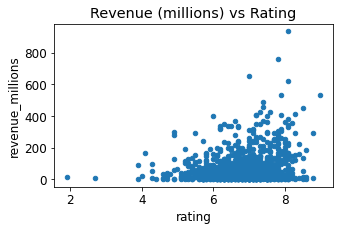

In [24]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

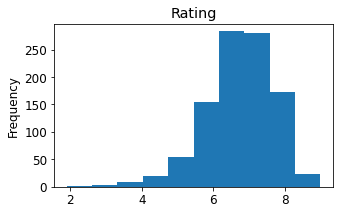

In [25]:
movies_df['rating'].plot(kind='hist', title='Rating');

Using a Boxplot we can visualize this data:

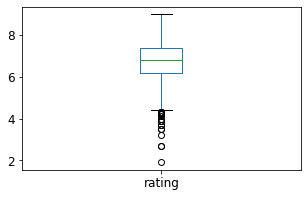

In [26]:
movies_df['rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


## Exercise

**Try on your own**

1. Plot a boxplot for revenues across all movies



### 4.6 Manipulating DataFrames

#### DataFrame slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we done simple statistics and plotting. 

Below are the other methods of slicing, selecting, and extracting you'll need to use constantly. 

Let's look at working with columns first.

##### Extracting data by column

Extract a column using square brackets like this:

In [27]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

Note: 

> one column of a *DataFrame* is a *Series*

If you don't want a *Series*, you can extract a column as a *DataFrame* by passing a list of column names. 

In our case that's just a single column:

In [28]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

You can extract two columns from the original dataframe like this: 
    

In [29]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


##### Extracting data by rows

For rows, we have two options: 

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Remember that we are still indexed by movie Title, so to use `.loc` we give it the Title of a movie:

In [30]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

On the other hand, with `iloc` we give it the numerical index of Prometheus:

In [31]:
prom = movies_df.iloc[1]

`loc` and `iloc` can be thought of as similar to Python `list` slicing. To show this even further, let's select multiple rows.

How would you do it with a list? 

In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [32]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


## Exercise

**Try on your own**

1. Select a subset of movies where the numerical indices are between 20-25, what is the title of the last movie in this subset?


#### Conditional selections

What if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [33]:
condition = movies_df[movies_df['director'] == "Ridley Scott"]

condition.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


Here we created a new DataFrame called *condition* and out of all 1,000 movies, these 5 have Ridley Scott as the director

You can get used to looking at these conditionals by reading it like: 

> Select movies_df where movies_df director equals Ridley Scott


Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:

In [34]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [35]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


We create a `list` of directors that we want to include in our subset, and then we only select the rows where that condition applies

Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

Here's how we could do all of that:

In [36]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Exercise

**Try on your own**

1. Find the subset of movies that were made in 2006
2. Find the subset of movies that have either Comedy or Drama as a genre
3. Find the subset of movies that have a rating over 8.0 and were made after 2010


#### Applying functions

We can use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [37]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [38]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `.apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. This Series is then assigned to a new column called `rating_category`.

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

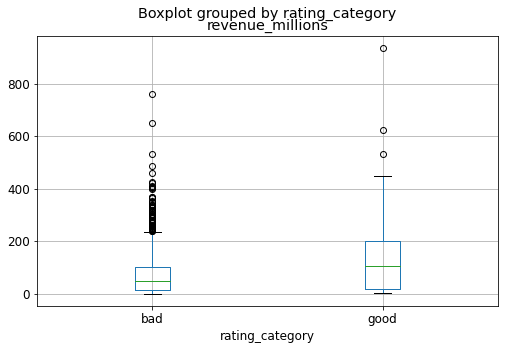

In [39]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 5)}) # set font and plot size to be larger
movies_df.boxplot(column='revenue_millions', by='rating_category');

## Exercise

**Try on your own**

1. Make a function that categorizes movies based on "old" and "new" (anything before 2008 is considered old)
2. Plot this year_category using a box plot grouped by and describe what you see
